# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from scipy.stats import stats
sns.set()

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

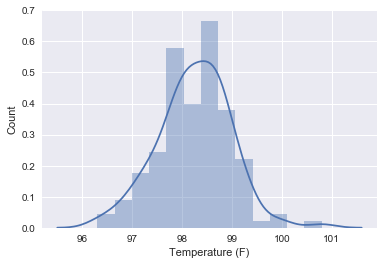

In [4]:
sns.distplot(df.temperature)
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.show()

Graphically, the data seems to be normally distributed, a bit skewed to the right.There may be outliers.

In [5]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

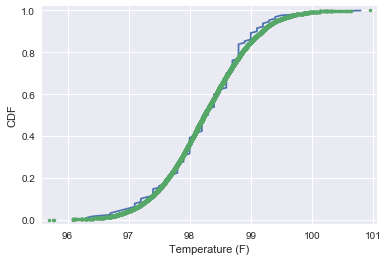

In [6]:
mean = np.mean(df.temperature)
std = np.std(df.temperature)
sample = np.random.normal(mean, std, 10000)
x, y = ecdf(df.temperature)
x_theor, y_theor = ecdf(sample)
_ = plt.plot(x,y)
_ = plt.plot(x_theor, y_theor, marker = '.', linestyle='none')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('CDF')
_ = plt.margins(0.02)
plt.show()

In [7]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

###  1. Is the distribution of body temperatures normal?

Graphically visualizing the data, the temperatures seem normally distributed. The ECDF overlays well with the ECDF, thus eliminating binning bias, and suggesting that the temperatures are normally distributed. 
The p-value of 0.25 is greater than 0.05, so there is a good probability that the distribution is normal.

###  2. Is the sample size large? Are the observations independent?

According to the Central Limit Theorem, a sample size of 30 is large enough. Since theree are 130 observations, we can assume that the sample size is large. 

The observations are independent because:
* Each observation is randomly generated in a way that it does not depend on the values of the other observations. 
* Sample size less than or equal to 10% of the population assumes independence. We have 130 samples from a population of over 7 billion.

###  3. Is the true population mean really 98.6 F?

#### Would you use a one-sample or a two-sample test? Why?
I would use a one sample test as we have only one sample of the population. 

#### In this situation is it appropriate to use the t or the z statistic? Why?
Since the sample size greater than 30, we can use z-statistic. We have 130 samples.
 




In frequentist statistical testing, data that are normally distributed are tested against the null hypothesis. 
We will assume:

Null Hypothesis = 98.6

Alternate Hypothesis != 98.6

Significance level (alpha) = 0.05

#### Bootstrap hypothesis test with 10,000 replicates

In [8]:
bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = np.mean(np.random.choice(df.temperature, len(df.temperature)))

p_value = np.sum(bs_replicates >= 98.6) / len(bs_replicates) 
confidence_interval = np.percentile(bs_replicates, [2.5, 97.5])
print('p-value is ', p_value)
print('95% confidence interval is ', confidence_interval)

p-value is  0.0
95% confidence interval is  [ 98.12461538  98.37307692]


Since p-value is lower than the significance level, we reject the null hypothesis.

#### Other test

In [10]:
# T-test and Z-score
 
t_stat = stats.ttest_1samp(df.temperature, 98.6)
t_stat_repl = stats.ttest_1samp(bs_replicates, 98.6)
z_score = (98.6 - np.mean(df.temperature / np.std(df.temperature)))
z_score_repl = (98.6 - np.mean(bs_replicates)) / np.std(bs_replicates)
print('t-statistic & p-value: ', t_stat)
print('t-statistic & p-value bootstrap replicates : ', t_stat_repl)
print('z-score is ', z_score)
print('z-score using bootstrap replicates is ', z_score_repl)

t-statistic & p-value:  Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)
t-statistic & p-value bootstrap replicates :  Ttest_1sampResult(statistic=-549.59825877914523, pvalue=0.0)
z-score is  -35.92205700681018
z-score using bootstrap replicates is  5.49625740753


#### Draw a small sample of size 10 from the data and repeat both frequentist tests. 
Which one is the correct one to use? 
What do you notice? What does this tell you about the difference in application of the 
t
t
and 
z
z
statistic? 

In [11]:
small_sample = np.random.choice(df.temperature, 10)
print(small_sample)

[ 98.6  99.   98.2  98.   98.2  97.4  98.7  97.4  97.4  97.7]


In [12]:
# Bootstrap hypothesis for small sample

small_replicates = np.empty(10000)

for i in range(10000):
    small_replicates[i] = np.mean(np.random.choice(small_sample, len(small_sample)))

p_value = np.sum(small_replicates >= 98.6)/len(small_replicates) 
confidence_interval = np.percentile(small_replicates, [2.5, 97.5])
print('p-value is ', p_value)
print('confidence interval is ', confidence_interval)

p-value is  0.0008
confidence interval is  [ 97.72  98.41]


#### t t and z z statistic for small sample

In [13]:
t_stat = scipy.stats.ttest_1samp(small_sample, 98.6)
t_stat_repl = scipy.stats.ttest_1samp(small_replicates, 98.6)
z_score = (98.6 - np.mean(small_sample / np.std(small_sample)))
z_score_repl = (98.6 - np.mean(small_replicates)) / np.std(small_replicates)
print('t-statistic & p-value for small sample : ', t_stat)
print('t-statistic & p-value for bootstrap replicates: ', t_stat_repl)
print('z-score for the small sample is ', z_score)
print('z-score using bootstrap replicates is ', z_score_repl)

t-statistic & p-value for small sample :  Ttest_1sampResult(statistic=-2.926648962796162, pvalue=0.016848588676086244)
t-statistic & p-value for bootstrap replicates:  Ttest_1sampResult(statistic=-309.63733088884521, pvalue=0.0)
z-score for the small sample is  -78.5525909209
z-score using bootstrap replicates is  3.09652813917


t test is a better choice since the sample size is small (10 samples instead of 130).  
In this case, p-value allows us to reject the null hypothesis. Z-score can give inaccurate results for a very small sample. 

#### At what temperature should we consider someone's temperature to be "abnormal"? 



In [15]:
one_draw = np.mean(np.random.choice(df.temperature, len(df.temperature)))
confidence_interval = np.percentile(bs_replicates, [2.5, 97.5])
margin_of_error = np.std(np.mean(df.temperature)) / np.sqrt(130)
print('Margin of error is ', margin_of_error)
print('95% Confidence interval is ', confidence_interval)

Margin of error is  0.0
95% Confidence interval is  [ 98.12461538  98.37307692]


Based on the 95% confidence interval, we can consider that temperatures below 98.1 and about 98.4 are abnormal. 

#### Is there a significant difference between males and females in normal temperature? 

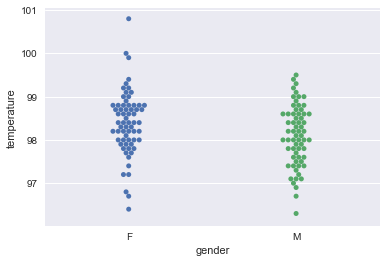

In [16]:
sns.swarmplot(x = 'gender', y = 'temperature', data = df)
plt.show()

Women have higher body temperatures than men, and a wider spread. There is an outlier at 100.8

In [17]:
df_male = df[df.gender == 'M']
df_female = df[df.gender == 'F']
df_male.head()

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


In [18]:
df_male.temperature.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [19]:
df_female.temperature.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

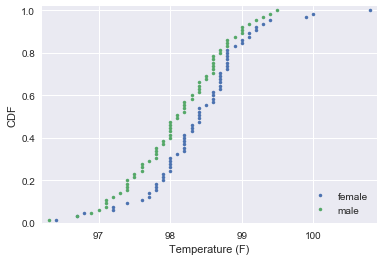

In [20]:
x_m, y_m = ecdf(df_male.temperature)
x_f, y_f = ecdf(df_female.temperature)
_ = plt.plot(x_f,y_f,  marker = '.', linestyle='none')
_ = plt.plot(x_m, y_m, marker = '.', linestyle='none')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('CDF')
_ = plt.legend(('female', 'male'), loc = 'lower right')
_ = plt.margins(0.02)
plt.show()

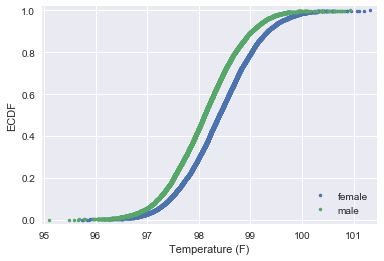

In [21]:
mean_m = np.mean(df_male.temperature)
std_m = np.std(df_male.temperature)
sample_m = np.random.normal(mean_m, std_m, 10000)
x_m, y_m = ecdf(sample_m)

mean_f = np.mean(df_female.temperature)
std_f = np.std(df_female.temperature)
sample_f = np.random.normal(mean_f, std_f, 10000)
x_f, y_f = ecdf(sample_f)

_ = plt.plot(x_f,y_f,  marker = '.', linestyle='none')
_ = plt.plot(x_m, y_m, marker = '.', linestyle='none')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('female', 'male'), loc = 'lower right')
_ = plt.margins(0.02)
plt.show()

In [27]:
perm_replicates = np.empty(10000)
diff_of_means = np.mean(df_female.temperature) - np.mean(df_male.temperature)

for i in range(10000):
    df_both = np.concatenate((df_male.temperature, df_female.temperature))
    perm_data = np.random.permutation(df_both)
    perm_data_male = perm_data[:len(df_male)]
    perm_data_female = perm_data[len(df_female):]
    perm_replicates[i] = abs(np.mean(perm_data_female) - np.mean(perm_data_male))

p_value = np.sum(perm_replicates >= diff_of_means) /  len(perm_replicates)
print('p-value is ', p_value)

p-value is  0.0258


p-value < 0.05, so we can assume the difference in the body temperatures of male and female are statistically significant. 

Body temperature is lower in men at 98.1F than in women. Women have a slightly higher temperature at 98.4F
The analysis rejects the hypothesis that the mean normal body temperature is 98.6F.